In [2]:
# modules
import gzip, json, os, pickle
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
DIR = '/home/mthommes/insight/project/'

# Load Data

In [5]:
file_name = 'reviews.sav'
data_df = pd.read_pickle(os.path.join(DIR, 'data', file_name))
display(data_df.head())

,book_id,date_added,date_updated,is_read,rating,read_at,review_id,review_text_incomplete,started_at,user_id
0,24375664,Fri Aug 25 13:55:02 -0700 2017,Mon Oct 09 08:55:59 -0700 2017,1.0,5.0,Sat Oct 07 00:00:00 -0700 2017,5cd416f3efc3f944fce4ce2db2290d5e,Mind blowingly cool. Best science fiction I've...,Sat Aug 26 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d
0,18245960,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,1.0,5.0,Sat Aug 26 12:05:52 -0700 2017,dfdbb7b0eb5a7e4c26d59a937e2e5feb,This is a special book. It started slow for ab...,Tue Aug 15 13:23:18 -0700 2017,8842281e1d1347389f2ab93d60773d4d
0,6392944,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,1.0,3.0,Tue Jul 25 00:00:00 -0700 2017,5e212a62bced17b4dbe41150e5bb9037,I haven't read a fun mystery book in a while a...,Mon Jul 24 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d
0,22078596,Mon Jul 24 02:33:09 -0700 2017,Sun Jul 30 10:23:54 -0700 2017,1.0,4.0,Sun Jul 30 15:42:05 -0700 2017,fdd13cad0695656be99828cd75d6eb73,"Fun, fast paced, and disturbing tale of murder...",Tue Jul 25 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d
0,6644782,Mon Jul 24 02:28:14 -0700 2017,Thu Aug 24 00:07:20 -0700 2017,1.0,4.0,Sat Aug 05 00:00:00 -0700 2017,bd0df91c9d918c0e433b9ab3a9a5c451,A fun book that gives you a sense of living in...,Sun Jul 30 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d


# Trim Data

In [6]:
# Remove books with less than 50 ratings
min_book_ratings = 50
books_trimmed = data_df['book_id'].value_counts() > min_book_ratings
books_trimmed = books_trimmed[books_trimmed].index.to_list()

# Remove users with less than 50 ratings
min_user_ratings = 50
users_trimmed = data_df['user_id'].value_counts() > min_user_ratings
users_trimmed = users_trimmed[users_trimmed].index.to_list()

new_data_df = data_df[(data_df['book_id'].isin(books_trimmed)) & (data_df['user_id'].isin(users_trimmed))]
print('Removed', len(data_df) - len(new_data_df), 'out of', len(data_df), 'items')

Removed 93317 out of 100000 items


### Save Data

In [7]:
file_name = 'reviews_trimmed.pkl'
pickle.dump(new_data_df, open(os.path.join(DIR, 'data', file_name), 'wb'))

# EDA

## Distribution of Book Ratings

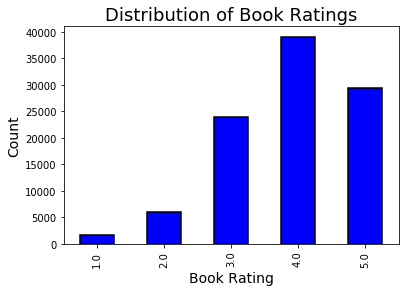

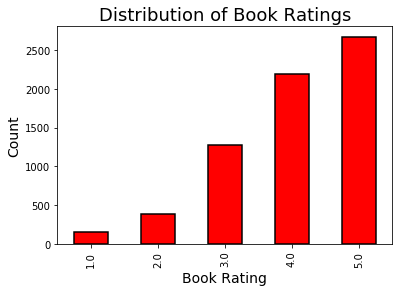

In [12]:
data1 = data_df['rating'].value_counts().sort_index(ascending=True)
data2 = new_data_df['rating'].value_counts().sort_index(ascending=True)

# Create plots
plt.figure(1)
data1.plot(kind='bar', label='Original', color='b', edgeColor='k', ls='-', lw=1.5);
plt.xlabel('Book Rating', FontSize=14)
plt.ylabel('Count', FontSize=14)
plt.title('Distribution of Book Ratings', FontSize=18);

plt.figure(2)
data2.plot(kind='bar', label='New', color='r', edgeColor='k', ls='-', lw=1.5);
plt.xlabel('Book Rating', FontSize=14)
plt.ylabel('Count', FontSize=14)
plt.title('Distribution of Book Ratings', FontSize=18);

## Ratings Distribution by Book

In [ ]:
data1 = data_df.groupby('book_id')['rating'].value_counts().sort_index(ascending=True)
data2 = new_data_df.groupby('book_id')['rating'].value_counts().sort_index(ascending=True)

# Create plots
plt.figure(1)
data1.plot(kind='bar', label='Original', color='b', edgeColor='k', ls='-', lw=1.5);
plt.xlabel('Number of Ratings per Book', FontSize=14)
plt.ylabel('Count', FontSize=14)
plt.title('Ratings Distribution by Book', FontSize=18);

plt.figure(2)
data2.plot(kind='bar', label='New', color='r', edgeColor='k', ls='-', lw=1.5);
plt.xlabel('Number of Ratings per Book', FontSize=14)
plt.ylabel('Count', FontSize=14)
plt.title('Ratings Distribution by Book', FontSize=18);

## Ratings Distribution By User

In [ ]:
data1 = data_df.groupby('user_id')['rating'].value_counts().sort_index(ascending=True)
data2 = new_data_df.groupby('user_id')['rating'].value_counts().sort_index(ascending=True)

# Create plot
plt.figure(1)
data1.plot(kind='bar', label='Original', color='b', edgeColor='k', ls='-', lw=1.5);
data2.plot(kind='bar', label='New', color='r', edgeColor='k', ls='-', lw=1.5);
plt.legend(loc='upper left')
plt.xlabel('Number of Ratings per User', FontSize=14)
plt.ylabel('Count', FontSize=14)
plt.title('Ratings Distribution by User', FontSize=18);

In [ ]:
data_df.groupby('user_id')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]

# Save Data

In [ ]:
file_name = 'reviews.sav'
ratings_data.to_pickle(os.path.join(save_DIR, 'data', 'reviews.sav'))